# Classification using scikit-learn

The goal of this tutorial is to introduce you to the scikit libraries for classification. We will also cover the topic of feature normalization, and evaluation.

In [2]:
import numpy as np
import scipy.sparse as sp_sparse

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing

import seaborn as sns

%matplotlib inline

## Feature normalization##

Python provides some functionality for normalizing and standardizing the data. Be careful though, some operations work only with dense data.

http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

Use the function **<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html">preprocessing.scale</a>** to normalize by removing the mean and dividing by the standard deviation. This is done per **feature**, that is, per column of the dataset.

In [2]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  1.],
              [ 0.,  1., -1.]])
print("column means: ",X.mean(axis = 0))
print("column std: ",X.std(axis = 0))
X_scaled = preprocessing.scale(X)
print("after feature normalization")
print(X_scaled)
print("normalized column means: ",X_scaled.mean(axis=0))
print("normalized column std: ",X_scaled.var(axis = 0))

column means:  [1.         0.         0.66666667]
column std:  [0.81649658 0.81649658 1.24721913]
after feature normalization
[[ 0.         -1.22474487  1.06904497]
 [ 1.22474487  0.          0.26726124]
 [-1.22474487  1.22474487 -1.33630621]]
normalized column means:  [0.00000000e+00 0.00000000e+00 1.48029737e-16]
normalized column std:  [1. 1. 1.]


Feature normalization will not work with sparse data. In this case, the zeros are treated as values, so the sparse matrix will become non-sparse after normalization.

In [3]:
import scipy.sparse
cX = scipy.sparse.csc_matrix(X)
cX_scaled = preprocessing.scale(cX)
print(cX_scaled)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead See docstring for motivation and alternatives.

The same can be done with the **<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a>** from the preprocessing library of sklearn.

The function **fit()** computes the parameters for scaling, and **transform()** applies the scaling

In [4]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X)
print(std_scaler.mean_)
print(std_scaler.scale_)
X_std = std_scaler.transform(X)
print("scaled data:")
print(X_std)

[1.         0.         0.66666667]
[0.81649658 0.81649658 1.24721913]
scaled data:
[[ 0.         -1.22474487  1.06904497]
 [ 1.22474487  0.          0.26726124]
 [-1.22474487  1.22474487 -1.33630621]]


The advantage is the we can now apply the transform to new data.

For example, we compute the parameters for the training data and we apply the scaling to the test data.

In [5]:
y = np.array([[2.,3.,1.],
              [1.,2.,1.]])
print(std_scaler.transform(y))

[[1.22474487 3.67423461 0.26726124]
 [0.         2.44948974 0.26726124]]


The **MinMaxScaler** subbtracts from each column the minimum and then divides by the max-min.

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
print(X_minmax)
print(min_max_scaler.transform(y))

[[0.5        0.         1.        ]
 [1.         0.5        0.66666667]
 [0.         1.         0.        ]]
[[1.         2.         0.66666667]
 [0.5        1.5        0.66666667]]


The **MaxAbsScaler** divides with the maximum absolute value. 

The MaxAbsScaler can work with sparse data, since it does not destroy the data sparseness. For the other datasets, removing the mean (or min) can destroy the sparseness of the data. 

Sometimes we may choose to normalize only the non-zero values. This should be done manually.

In [7]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_maxabs = max_abs_scaler.fit_transform(X)
X_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0.5],
       [ 0. ,  1. , -0.5]])

In [8]:
# works with sparse data
cX_scaled = max_abs_scaler.transform(cX)
print(cX_scaled)

  (0, 0)	0.5
  (1, 0)	1.0
  (0, 1)	-1.0
  (2, 1)	1.0
  (0, 2)	1.0
  (1, 2)	0.5
  (2, 2)	-0.5


The **normalize** function normalizes the **rows** so that they become unit vectors in some norm that we specify. It can be applied to sparse matrices without destroying the sparsity.

In [9]:
#works with sparse data

X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized                                      

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 0.89442719,  0.        ,  0.4472136 ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [10]:
crX = scipy.sparse.csr_matrix(X)
crX_scaled = preprocessing.normalize(crX,norm='l1')
print(crX_scaled)

  (0, 0)	0.25
  (0, 1)	-0.25
  (0, 2)	0.5
  (1, 0)	0.6666666666666666
  (1, 2)	0.3333333333333333
  (2, 1)	0.5
  (2, 2)	-0.5


### OneHotEncoder

The **OneHotEncoder** can be used for categorical data to transform them into binary, where for each attribute value we have 0 or 1 depending on whether this value appears in the feature vector. It works with numerical categorical values.

In [11]:
X = [[0,1,2],
     [1,2,3],
     [0,1,4]]
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
enc.transform([[0,2,4],[1,1,2]]).toarray()

array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 0.]])

In this example every number in every column defines a separate feature

In [12]:
enc.categories_

[array([0, 1]), array([1, 2]), array([2, 3, 4])]

We can also apply it selectively to some columns of the data

In [13]:
#works with sparse data

X = np.array([[0, 10, 45100],
     [1, 20, 45221],
     [0, 20, 45212]])
enc = preprocessing.OneHotEncoder(categorical_features=[2]) #only the third column is categorical
enc.fit(X)
enc.transform([[5,13,45212],[4,12,45221]]).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0.,  1.,  0.,  5., 13.],
       [ 0.,  0.,  1.,  4., 12.]])

## Feature Selection##

Feature selection is about finding the best features for your classifier. This may be important if you do not have enough training data. The idea is to find metrics that either characterize the features by themselves, or with respect to the class we want to predict, or with respect to other features.

http://scikit-learn.org/stable/modules/feature_selection.html

The **VarianceThreshold** selection drops features whose variance is below some threshold. If we have binary features we can estimate the treshold exactly so as to guarantee a specific ratio of 0's and 1's

In [14]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(np.array(X))
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

A more sophisticated feature selection technique uses the chi-square test to determine if a feature and the class label are independent.

https://en.wikipedia.org/wiki/Chi-squared_test

In this case we keep the features with high chi-score and low p-value. 

The features with the lowest scores and highest values are rejected.

The chi-square test is usually applied on categorical data.

In [15]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
print('Features:')
print(X[1:10,:])
print('Labels:')
print(y[1:10])
sel = SelectKBest(chi2, k=2)
X_new = sel.fit_transform(X, y)
print('Selected Features:')
print(X_new[1:10])
print('Chi2 values')
print(sel.scores_)
c,p = sk.feature_selection.chi2(X, y)
print('Chi2 values')
print(c) #The chi-square value between X columns and y
print('p-values')
print(p) #The p-value for the test

(150, 4)
Features:
[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Labels:
[0 0 0 0 0 0 0 0 0]
Selected Features:
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]
Chi2 values
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
Chi2 values
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]
p-values
[4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


## Supervised Learning

Python has several classes and objects for implementing different supervised learning techniques such as Regression and Classification. 

Regardless of the model being implemented, the following methods are implemented:

The method **fit()** takes the training data and labels/values, and trains the model

The method **predict()** takes as input the test data and applies the model. 

## Linear Regression

Linear Regression is implemented in the library sklearn.linear_model.LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [3]:
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

reg = LinearRegression().fit(X, y)
reg.score(X, y)


1.0

In [4]:
#Obtain the function coefficients
print(reg.coef_)
#and the intercept
print(reg.intercept_)

[1. 2.]
3.0000000000000018


In [5]:
#Predict for a new point
reg.predict(np.array([[3, 5]]))

array([16.])

## Classification models

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Python has classes and objects that implement the different classification techniques that we described in class. 

### Preparing the data###

Load the iris dataset

In [20]:
from sklearn.datasets import load_iris
import sklearn.utils as utils

iris = load_iris()
print("sample of data")
print(iris.data[:5,:])
print("the class labels vector")
print(iris.target)
print("the names of the classes:",iris.target_names)
print(iris.feature_names)

sample of data
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
the class labels vector
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
the names of the classes: ['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Randomly shuffle the data. This is useful to know that the data is in random order

In [21]:
X, y = utils.shuffle(iris.data, iris.target, random_state=1) #shuffle the data
print(X.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0
 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2
 2 0 0 1 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1
 2 0]


Select a subset for training and a subset for testing

In [22]:
train_set_size = 100
X_train = X[:train_set_size]  # selects first 100 rows (examples) for train set
y_train = y[:train_set_size]
X_test = X[train_set_size:]   # selects from row 100 until the last one for test set
y_test = y[train_set_size:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


We can also use the <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split">train_test_split function</a> of python for splitting the data into train and test sets. In this case you do not need the random shuffling (but it does not hurt).

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Decision Trees###
http://scikit-learn.org/stable/modules/tree.html

Train and apply a decision tree classifier. The default score computed in the classifier object is the accuracy.

In [26]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

print("classifier accuracy:",dtree.score(X_test,y_test))

y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)
print("classifier predictions:",y_pred[:10])
print("ground truth labels   :",y_test[:10])
print(y_prob[:10])

classifier accuracy: 0.95
classifier predictions: [2 2 2 0 0 0 2 2 2 2]
ground truth labels   : [1 2 2 0 0 0 2 2 2 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


Compute some more metrics

In [27]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

accuracy: 0.95

Confusion matrix
[[20  0  0]
 [ 0 17  2]
 [ 0  1 20]]

Precision Score per class
[1.         0.94444444 0.90909091]

Average Precision Score
0.9505892255892257

Recall Score per class
[1.         0.89473684 0.95238095]

Average Recall Score
0.95

F1-score Score per class
[1.         0.91891892 0.93023256]

Average F1 Score
0.9499057196731615


Visualize the decision tree.

For this you will need to install the package python-graphviz

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


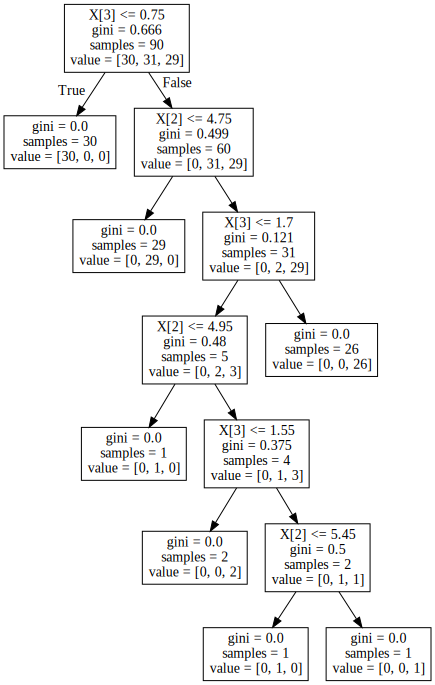

In [28]:
#conda install python-graphviz
import graphviz 
print(iris.feature_names)
dot_data = tree.export_graphviz(dtree,out_file=None)
graph = graphviz.Source(dot_data)
graph

0.9166666666666666


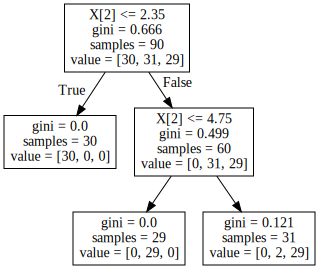

In [30]:
dtree2 = tree.DecisionTreeClassifier(max_depth=2)
dtree2 = dtree2.fit(X_train, y_train)
print(dtree2.score(X_test,y_test))
dot_data2 = tree.export_graphviz(dtree2,out_file=None)
graph2 = graphviz.Source(dot_data2)
graph2


### k-NN Classification ###

http://scikit-learn.org/stable/modules/neighbors.html

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("classifier score:", knn.score(X_test,y_test))

y_pred = knn.predict(X_test)

print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.9333333333333333

accuracy: 0.9333333333333333

Confusion matrix
[[20  0  0]
 [ 0 16  3]
 [ 0  1 20]]

Precision Score per class
[1.         0.94117647 0.86956522]

Average Precision Score
0.9357203751065644

Recall Score per class
[1.         0.84210526 0.95238095]

Average Recall Score
0.9333333333333333

F1-score Score per class
[1.         0.88888889 0.90909091]

Average F1 Score
0.9329966329966328


### SVM Classification###

http://scikit-learn.org/stable/modules/svm.html

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [32]:
from sklearn import svm

#svm_clf = svm.LinearSVC()
#svm_clf = svm.SVC(kernel = 'poly')
svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)
print("classifier score:",svm_clf.score(X_test,y_test))
y_pred = svm_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))

classifier score: 0.9666666666666667

accuracy: 0.9666666666666667

Confusion matrix
[[20  0  0]
 [ 0 18  1]
 [ 0  1 20]]

Precision Score per class
[1.         0.94736842 0.95238095]

Average Precision Score
0.9666666666666667

Recall Score per class
[1.         0.94736842 0.95238095]

Average Recall Score
0.9666666666666667

F1-score Score per class
[1.         0.94736842 0.95238095]

Average F1 Score
0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Logistic Regression ###

http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [45]:
import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)
print("classifier score:",lr_clf.score(X_test,y_test))
y_pred = lr_clf.predict(X_test)
print("\naccuracy:",metrics.accuracy_score(y_test,y_pred))
print("\nConfusion matrix")
print(metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision Score per class")
print(metrics.precision_score(y_test,y_pred,average=None))
print("\nAverage Precision Score")
print(metrics.precision_score(y_test,y_pred,average='weighted'))
print("\nRecall Score per class")
print(metrics.recall_score(y_test,y_pred,average=None))
print("\nAverage Recall Score")
print(metrics.recall_score(y_test,y_pred,average='weighted'))
print("\nF1-score Score per class")
print(metrics.f1_score(y_test,y_pred,average=None))
print("\nAverage F1 Score")
print(metrics.f1_score(y_test,y_pred,average='weighted'))


classifier score: 0.9833333333333333

accuracy: 0.9833333333333333

Confusion matrix
[[20  0  0]
 [ 0 18  1]
 [ 0  0 21]]

Precision Score per class
[1.         1.         0.95454545]

Average Precision Score
0.9840909090909091

Recall Score per class
[1.         0.94736842 1.        ]

Average Recall Score
0.9833333333333333

F1-score Score per class
[1.         0.97297297 0.97674419]

Average F1 Score
0.9833019065577204


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


For Logistic Regression we can also obtain the probabilities for the different classes

In [46]:
probs = lr_clf.predict_proba(X_test)
print("Class Probabilities (first 10):")
print (probs[:10])
print(probs.argmax(axis = 1)[:10])
print(probs.max(axis = 1)[:10])

Class Probabilities (first 10):
[[8.97030460e-03 3.32653685e-01 6.58376010e-01]
 [3.65818540e-03 4.12481405e-01 5.83860409e-01]
 [6.12425133e-04 3.31379557e-01 6.68008018e-01]
 [9.06929006e-01 9.26073940e-02 4.63599597e-04]
 [8.98809388e-01 1.00868455e-01 3.22156817e-04]
 [9.57598497e-01 4.23682210e-02 3.32819743e-05]
 [1.32310636e-03 3.27816831e-01 6.70860062e-01]
 [1.27558143e-03 3.77948164e-01 6.20776255e-01]
 [1.50692477e-03 3.85667745e-01 6.12825330e-01]
 [8.56351814e-04 2.05563299e-01 7.93580350e-01]]
[2 2 2 0 0 0 2 2 2 2]
[0.65837601 0.58386041 0.66800802 0.90692901 0.89880939 0.9575985
 0.67086006 0.62077626 0.61282533 0.79358035]


In [47]:
print(lr_clf.coef_)

[[ 0.40967244  1.25382589 -2.05048616 -0.94328782]
 [ 0.08015593 -1.18508674  0.71601843 -1.18588825]
 [-1.31822513 -1.2196971   1.90603048  2.14869569]]


## Evaluation##

http://scikit-learn.org/stable/model_selection.html#model-selection

### Computing Scores###

In [35]:
p,r,f,s = metrics.precision_recall_fscore_support(y_test,y_pred)
print(p)
print(r)
print(f)

[1.         1.         0.95454545]
[1.         0.94736842 1.        ]
[1.         0.97297297 0.97674419]


In [36]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [37]:
#y_true = np.array([0, 0, 1, 1])
y_true = np.array(y_test)
print(y_true)
print(y_test)
y_true[y_true != 2] = 0
y_true[y_true==2] = 1
#y_scores = np.array([0.1, 0.4, 0.35, 0.8])
y_scores = probs[:,2]
precision, recall, thresholds = metrics.precision_recall_curve(y_true,y_scores)
plt.scatter(recall,precision)
print(recall)
print(precision)
print(thresholds)
fpr, tpr, ths = metrics.roc_curve(y_true,y_scores)
print(metrics.roc_auc_score(y_true,y_scores))

[1 2 2 0 0 0 2 2 2 2 1 0 0 2 0 0 2 1 2 1 2 0 2 0 1 1 1 2 1 0 1 0 0 0 1 1 0
 2 2 2 0 1 2 2 1 0 2 1 2 0 1 1 2 0 1 0 1 2 0 1]
[1 2 2 0 0 0 2 2 2 2 1 0 0 2 0 0 2 1 2 1 2 0 2 0 1 1 1 2 1 0 1 0 0 0 1 1 0
 2 2 2 0 1 2 2 1 0 2 1 2 0 1 1 2 0 1 0 1 2 0 1]
[1.         0.95238095 0.9047619  0.85714286 0.80952381 0.76190476
 0.71428571 0.66666667 0.61904762 0.57142857 0.52380952 0.47619048
 0.42857143 0.42857143 0.38095238 0.33333333 0.28571429 0.23809524
 0.19047619 0.14285714 0.0952381  0.04761905 0.        ]
[0.95454545 0.95238095 0.95       0.94736842 0.94444444 0.94117647
 0.9375     0.93333333 0.92857143 0.92307692 0.91666667 0.90909091
 0.9        1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]
[0.53249179 0.5629576  0.56738458 0.57631424 0.58375136 0.58386041
 0.59335927 0.61282533 0.62077626 0.62133329 0.62979571 0.65821261
 0.65837601 0.66098423 0.66747926 0.66800802 0.67086006 0.70778921
 0.77223785 0.78197133 0.79358035 0.80107601]

[[3.77370472e-01 6.22629528e-01]
 [2.45764525e-01 7.54235475e-01]
 [9.55732028e-01 4.42679720e-02]
 [6.49618888e-02 9.35038111e-01]
 [9.96761172e-01 3.23882757e-03]
 [8.48084973e-01 1.51915027e-01]
 [1.37370823e-02 9.86262918e-01]
 [9.91410858e-01 8.58914193e-03]
 [1.07285120e-02 9.89271488e-01]
 [1.32956477e-01 8.67043523e-01]
 [9.00114032e-01 9.98859677e-02]
 [5.81855715e-01 4.18144285e-01]
 [4.66472885e-01 5.33527115e-01]
 [9.49946726e-02 9.05005327e-01]
 [7.90837701e-02 9.20916230e-01]
 [1.21474243e-02 9.87852576e-01]
 [9.45920522e-01 5.40794779e-02]
 [8.77669120e-01 1.22330880e-01]
 [8.23113230e-01 1.76886770e-01]
 [1.34727130e-01 8.65272870e-01]
 [9.16936132e-01 8.30638684e-02]
 [9.97031231e-01 2.96876947e-03]
 [1.11306173e-01 8.88693827e-01]
 [8.34451469e-01 1.65548531e-01]
 [1.16554534e-01 8.83445466e-01]
 [2.06443705e-01 7.93556295e-01]
 [1.84548962e-02 9.81545104e-01]
 [8.86146769e-01 1.13853231e-01]
 [1.80703525e-02 9.81929647e-01]
 [1.57229910e-01 8.42770090e-01]
 [8.256392

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


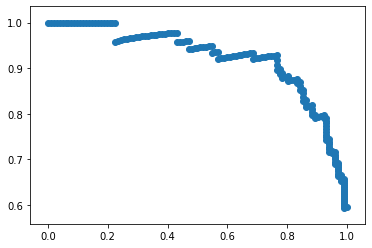

In [38]:
(Xtoy,y_toy)=sk_data.make_classification(n_samples=1000)
Xttrain = Xtoy[:800,:]
Xttest = Xtoy[800:,:]
yttrain = y_toy[:800]
yttest = y_toy[800:]

lr_clf.fit(Xttrain, yttrain)
#print(lr_clf.score(Xttest,yttest))
#y_tpred = lr_clf.predict(X_test)
tprobs = lr_clf.predict_proba(Xttest)
print (tprobs)

y_tscores = tprobs[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(yttest,y_tscores)
plt.scatter(recall,precision)

### k-fold cross validation ###

In k-fold cross validation the data is split into k equal parts, the k-1 are used for training and the last one for testing. k models are trained, each time leaving a different part for testing

https://scikit-learn.org/stable/modules/cross_validation.html

There are two methods for implementing k-fold cross-validation, under the library model selection: <a href = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html>cross_val_score</a>, and <a href = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html>cross validate</a>. The latter allows multiple metrics to be considered together.

In [41]:
import sklearn.model_selection as model_selection

scores = model_selection.cross_val_score(#lr_clf,
                                          #svm_clf,
                                          #knn,
                                          dtree,
                                          X,
                                          y,
                                          scoring='f1_weighted',
                                          cv=5)
print (scores)
print (scores.mean())

[1.         0.93333333 0.96658312 0.96658312 0.86111111]
0.9455221386800334


In [42]:
scores = model_selection.cross_validate(#lr_clf,
                                          #svm_clf,
                                          #knn,
                                          dtree,
                                          X,
                                          y,
                                          scoring=['precision_weighted','recall_weighted'],
                                          cv=3)
print (scores)
print (scores['test_precision_weighted'].mean(),scores['test_recall_weighted'].mean())

{'fit_time': array([0.00129271, 0.00107265, 0.00052547]), 'score_time': array([0.00336623, 0.0021081 , 0.00261068]), 'test_precision_weighted': array([0.96078431, 0.90952381, 0.90418354]), 'test_recall_weighted': array([0.96078431, 0.90196078, 0.89583333])}
0.9248305530039276 0.9195261437908497
